In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import xarray as xr
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load the FashionMNIST dataset
training_data = datasets.FashionMNIST(
    root='data', train=True, download=True, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data', train=False, download=True, transform=ToTensor()
)

# Convert to numpy arrays
train_images = np.stack([image.numpy() for image, _ in training_data])
train_labels = np.array([label for _, label in training_data])

test_images = np.stack([image.numpy() for image, _ in test_data])
test_labels = np.array([label for _, label in test_data])

# Create Xarray datasets
train_ds = xr.Dataset(
    {
        'images': (['sample', 'channel', 'height', 'width'], train_images),
        'labels': (['sample'], train_labels),
    },
    coords={'sample': np.arange(train_images.shape[0])},
)

test_ds = xr.Dataset(
    {
        'images': (['sample', 'channel', 'height', 'width'], test_images),
        'labels': (['sample'], test_labels),
    },
    coords={'sample': np.arange(test_images.shape[0])},
)

# # Save the datasets to NetCDF files
# train_ds.to_netcdf("fashion_mnist_train.nc")
# test_ds.to_netcdf("fashion_mnist_test.nc")

print('FashionMNIST datasets saved as Xarray datasets!')

FashionMNIST datasets saved as Xarray datasets!


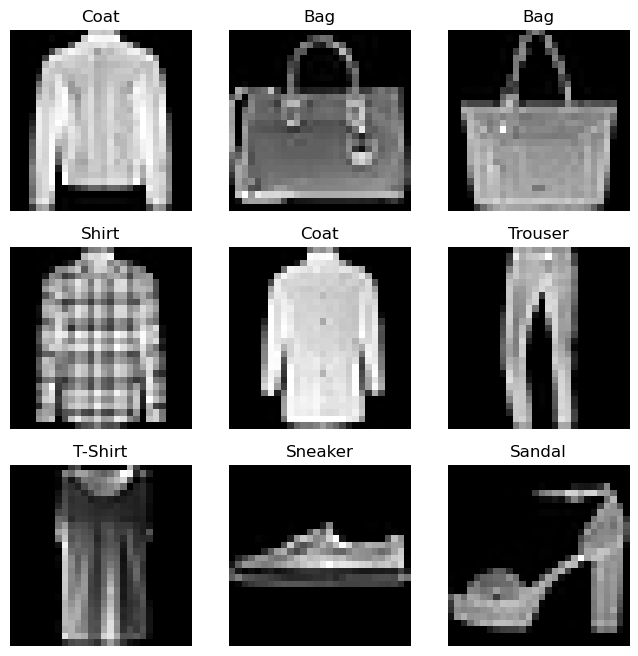

In [2]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    sample = train_ds.isel(sample=sample_idx)
    img, label = sample.images, sample.labels.data.item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [3]:
train_ds.to_zarr(
    's3://carbonplan-share/xbatcher/fashion-mnist-train.zarr', consolidated=True
)

In [4]:
test_ds.to_zarr(
    's3://carbonplan-share/xbatcher/fashion-mnist-test.zarr', consolidated=True
)